# Introducción

La implementación de difetentes algoritmos de desempeño es importante para conocer qué algoritmo es mejor ordenando, para ello además de realizar mediciones de tiempo real, es decir, mediciones que incluyan el tiempo que tardan en ejecutarse se miden el número de comparaciones que realizan para hacer comparaciones. Se presentan las implementaciones de algoritmos de HeapSort, MergeSort, QuickSort, BubbleSort y Skiplists, de los cuales veremos que los que tienen mejor desempeño (tardan menos tiempo) ordenando son los de heapsort, mergesort y skiplists. Las medidas de desempeño realizadas no fueron las más prácticas ya que demoraron un tiempo bastante amplio, eso debido al número de muestras tomadas para cada algoritmo, las cuales se tomaron de acuerdo a los resultados de arrojados por la función `tun()` de benchmarkTools.

La comparación de desempeño de cada algoritmo se hará mediante los datos almacenados en 6 archivos, los cuales tienen diferentes niveles de perturbación, es decir, en cada archivo hay diferentes niveles de desorden lo cual se verá reflejado en los resultados. 

Para poder realizar las implementaciones de los primeros cuatro algoritmos mencionados me apoyé en los pseudocódigos del libro de "Introducción a los Algoritmos"¹, mientras que para realizar la implementación de SkipLists revisé directamente el artículo del mismo². Un aspecto importante durante la implementación de algunos de estos algoritmos es el uso de estructuras, las cuales permiten respetar características importantes como en el caso de heapsort. Para todos los algoritmos antes de someterlos a mediciones de desempeño se evaluaron con arreglos pequeños para asegurar que estaban ordenando los arreglos de forma correcta.

Hay que resaltar que las líneas de código comentadas en las implementaciones tienen que ver con las que son usadas para realizar el conteo de comparaciones así como las pruebas individuales para corroborar que el algoritmo ordena adecuadamente.

Para la generación de gráficos se usan dataframes y todo el código mostrado está en Julia.

Se divide en las siguientes secciones el reporte
- Implementaciones. Se muestran las implementaciones para cada algoritmo junto con la carga de datos de los archivos
- Medición de tiempo real. Se muestra cómo se hacen las mediciones de tiempo real para cada algoritmo y se almacenan resultados
- Medición de comparaciones. Se muestra cómo se hacen las mediciones de comparaciones para cada algoritmo y se guardan resultados
- Procesamiento de datos. Se acomodan los resultados de forma conveniente para poder graficarlos
- Resultados. Se muestran las gráficas de desempeño, primero las de tiempo real y luego las de de comparaciones.
- Conclusiones.
- Referencias.




# Implementaciones

## Heapsort

Se utiliza el pseudocódigo encontrado en el libro de Cormen¹.

Es importante destacar que la implementación de la estructura Heap, permite guardar atributos importantes de tamaño de heap (heap_size) así como tamaño de arreglo. Es importante definirla como `mutable` ya que a lo largo del algoritmo se cambian los valores del Heap y solo con esa definición permite cambiar los valores. Algo importante a resaltar es que esta estructura Heap tiene la característica de ser un árbol binario.

In [514]:
mutable struct Heap
    array::Vector{Int}  
    heap_size::Int      
    length::Int         
end

left(i) = 2 * i
right(i) = 2 * i + 1

# function max_heapify!(A::Heap, i, contar::Ref{Int})
function max_heapify!(A::Heap, i)
    l = left(i)
    r = right(i)
    largest = i

    if l <= A.heap_size && A.array[l] > A.array[i]
        # contar[] += 1 
        largest = l
    end

    if r <= A.heap_size && A.array[r] > A.array[largest]
        # contar[] += 1
        largest = r
    end

    if largest != i
        A.array[i], A.array[largest] = A.array[largest], A.array[i]  
        # max_heapify!(A, largest, contar)  
        max_heapify!(A, largest)  
    end
end

# function build_max_heap!(A::Heap, contar::Ref{Int})
function build_max_heap!(A::Heap)
    A.heap_size = A.length
    for i in A.length ÷ 2:-1:1
        # max_heapify!(A, i, contar)
        max_heapify!(A, i)
    end
end

function heapsort!(arreglo::Vector{Int})
    # contar = Ref(0)
    A = Heap(arreglo, length(arreglo), length(arreglo))  
    # build_max_heap!(A, contar) 
    build_max_heap!(A) 

    for i in A.length:-1:2
        A.array[1], A.array[i] = A.array[i], A.array[1]  
        A.heap_size -= 1  
        # max_heapify!(A, 1, contar)  
        max_heapify!(A, 1)  
    end
    # return contar[]
end

# a = [23, 17, 14, 6, 13, 10, 1, 5, 7, 12]
# heapsort!(a)
# comparaciones = heapsort!(a)
# println("Comparaciones: ", comparaciones)
# println(a)


heapsort! (generic function with 1 method)

## Mergesort
Se utiliza el pseudocódigo encontrado en el libro de Cormen¹

In [515]:
# function merge!(A,p,q,r, contar)
function merge!(A,p,q,r)
    n1 = q-p+1
    n2 = r-q
    L=zeros(n1+1)
    R=zeros(n2+1)
    for i in 1:n1
        L[i]=A[p+i-1]
    end
    for j in 1:n2
        R[j] = A[q+j]
    end
    L[n1+1]= Inf
    R[n2+1]= Inf
    
    i=1
    j=1
    for k in p:r
        # contar[1] += 1
        if L[i] <= R[j]
            A[k] = L[i]
            i=i+1
        else 
            A[k] = R[j]
            j=j+1
        end
    end    
end    

# function mergeSort!(A,p,r, contar)
function mergeSort!(A,p,r)
    if p < r
        q = div(p+r,2)
        # mergeSort!(A,p,q, contar)
        # mergeSort!(A,q+1,r, contar)
        # merge!(A,p,q,r, contar)
        mergeSort!(A,p,q)
        mergeSort!(A,q+1,r)
        merge!(A,p,q,r)
    end    
    # return contar
end     
# A=[5, 2, 4,7,1,3,2,6]
# contar = [0]
# mergeSort!(A, 1, length(A), contar)
# mergeSort!(A, 1, length(A))
# println("Comparaciones: ", contar[])
# println(A)

mergeSort! (generic function with 2 methods)

## Quicksort
Se utiliza el pseudocódigo encontrado en el libro de Cormen¹

In [516]:
function quicksort!(A, p, r)
    # contar = 0
    if p < r
        # q, cont_cacho = partition!(A, p, r)
        # contar += cont_cacho
        # contar += quicksort!(A, p, q - 1)
        # contar += quicksort!(A, q + 1, r)
        q = partition!(A, p, r)
        quicksort!(A, p, q - 1)
        quicksort!(A, q + 1, r)
    end
    # return contar
end

function partition!(A, p, r)
    x = A[r]
    i = p - 1
    # contar = 0
    for j in p:r-1
        # contar += 1
        if A[j] <= x
            i += 1
            A[i], A[j] = A[j], A[i]  
        end
    end
    A[i + 1], A[r] = A[r], A[i + 1]  
    return i + 1
    # return i + 1, contar
end

# A = [3, 6, 8, 10, 1, 2, 1]
# quicksort!(A, 1, length(A))
# comparaciones = quicksort!(A, 1, length(A))
# println("Comparaciones: ", comparaciones)
# println(A)

partition! (generic function with 1 method)

## Bubblesort
Se utiliza el pseudocódigo encontrado en el libro de Cormen¹

In [517]:
function bubbleSort!(A,n)
    # contar = 0
    for i in 1:(n -1)
        for j in 1:n-i
            # contar += 1
            if A[j] > A[j+1]
                A[j], A[j+1] = A[j+1], A[j]
            end
        end
    end
    # return contar
end
# A = [3, 6, 8, 10, 1, 2, 1]
# bubbleSort!(A, length(A))
# comparaciones = bubbleSort!(A, length(A))
# println("Comparaciones: ", comparaciones)
# println(A)

bubbleSort! (generic function with 1 method)

## Skiplist (Sorting)
Se utiliza el pseudocódigo encontrado en el paper de este algoritmo². También fue necesario definir una estructura para Nodo, que es la que almacena atributos de llave, valor, el nodo siguiente, asi como una función que apunta a Nada en caso de ser el útltimo.
La estructura SkipList es la principal del algoritmo ya que en ella se define el nivel del nodo así como los encabezados de la lista.

Dado que esta lista es de tipo probabilístico requiere de un parámetro $p$, y un nivel máximo de niveles para nodos, se usan los valores que proporciona el paper ya que menciona que empezar la búsqueda en el máximo nivel no agrega más que una constante de tiempo²

In [518]:
using Random

const MaxLevel = 16
const p = 0.5

mutable struct Node
    key::Int
    value::Any
    forward::Vector{Union{Node, Nothing}}
    
    function Node(level::Int, key::Int, value::Any)
        new(key, value, Vector{Union{Node, Nothing}}(nothing, level))
    end
end

mutable struct SkipList
    header::Node
    level::Int
    
    function SkipList()
        header = Node(MaxLevel, -1, nothing)
        new(header, 1)
    end
end

function randomLevel()
    newLevel = 1
    while rand() < p && newLevel < MaxLevel
        newLevel += 1
    end
    return newLevel
end

# function Insert!(list::SkipList, searchKey::Int, newValue::Any, contar::Ref{Int})
function Insert!(list::SkipList, searchKey::Int, newValue::Any)
    update = Vector{Union{Node, Nothing}}(nothing, MaxLevel)
    x = list.header
    
    for i in list.level:-1:1
        while x.forward[i] !== nothing && x.forward[i].key < searchKey
            x = x.forward[i]
            # contar[] += 1
        end
        # contar[] += 1
        update[i] = x
    end
    
    x = x.forward[1]
    
    if x !== nothing && x.key == searchKey
        x.value = newValue
    else
        newLevel = randomLevel()
        
        if newLevel > list.level
            for i in (list.level + 1):newLevel
                update[i] = list.header
            end
            list.level = newLevel
        end
        
        x = Node(newLevel, searchKey, newValue)
        
        for i in 1:newLevel
            x.forward[i] = update[i].forward[i]
            update[i].forward[i] = x
        end
    end
    # contar[] += 1

end

function sortArray!(arr::Vector{Int})
    list = SkipList()
    # contar = Ref(0)

    for element in arr
        # Insert!(list, element, element, contar)
        Insert!(list, element, element)
    end
    
    x = list.header.forward[1]
    i = 1
    
    while x !== nothing
        # contar[] += 1
        arr[i] = x.key
        x = x.forward[1]
        i += 1
    end
    return arr
    # return arr, contar[]
end

# arr = [9, 3, 7, 5, 6, 4, 8, 2]
# sortArray!(arr)
# arr, comparaciones = sortArray!(arr)
# println("Comparaciones: ", comparaciones)
# println(arr)

sortArray! (generic function with 1 method)

## Carga de archivos

Se hace uso del paquete de JSON para cargar el contenido de los archivos y se almacena en un arreglo `archivos`. De forma que cada posición del arreglo de archivos corresponde a un único archivo.

In [509]:
using JSON
archivos = []
push!(archivos,JSON.parsefile("listas-posteo-con-perturbaciones-p=016.json"))
push!(archivos,JSON.parsefile("listas-posteo-con-perturbaciones-p=032.json"))
push!(archivos,JSON.parsefile("listas-posteo-con-perturbaciones-p=064.json"))
push!(archivos,JSON.parsefile("listas-posteo-con-perturbaciones-p=128.json"))
push!(archivos,JSON.parsefile("listas-posteo-con-perturbaciones-p=256.json"))
push!(archivos,JSON.parsefile("listas-posteo-con-perturbaciones-p=512.json"))
println("Archivos cargados")

Archivos cargados


Se observa que cada archivo tiene una estructura de diccionario con 100 llaves asociadas para cada uno y una lista por llave.

In [462]:
println(typeof(archivos[1]))
println(length(archivos[1]))
println(typeof(archivos[1]["reunion"]))        

Dict{String, Any}
100
Vector{Any}


# Medición de tiempo real

Para realizar las mediciones de desempeño se analizaron primero los archivos, observando que para cada archivo se tiene 1 diccionario con 100 llaves en formato String y por cada llave una lista de números. Sin embargo en todos los archivos se tienen esas mismas llaves con el mismo tamaño de listas dependiendo la llave. 
Se procede a revisar los tamaños de listas y se encuentra que los tamaños estan distribuidas de la siguiente forma
- 63 listas con tamaños <= 1000 elementos
- 33 listas con tamaños > 1000 && <= 5000
- 1 lista con tamaño > 5000 && <= 8000
- 3 listas con tamaño > 8000 elementos


Por lo que se hacen pruebas individuales de benchmark con todos los algoritmos en las listas más pequeñas y las listas más grandes para revisar cuales son los parámetros óptimos de muestras y evaluaciones.
Se aplica la función `tun!()` sobre las listas de las llaves **"_url"**, la cual tiene el tamaño máximo de elementos con 41328 elementos, y sobre las listas de la llave **"jovenes"** que tiene 520 elementos.

Se encontró que para la llave "jovenes" los parámetros óptimos son `samples=10000` y `eval=1` para todos los algoritmos, mientras que para la llave "_url" quedaron de la siguiente forma 
- *heapsort 1116 samples with 1 evaluation per sample*
- *mergesort 762 samples with 1 evaluation per sample*
- *quicksort 4 samples with 1 evaluation per sample* 
- *bubblesort 7 samples with 1 evaluation per sample*
- *skiplist 399 samples with 1 evaluation per sample*

Por ello se decide usar parámetros de benchmarks de `samples=10000` y `eval=1` para listas que tengan tamaños menores a 5000 elementos y los anteriores parámetros si superan ese tamaño de elementos. 

In [102]:
using BenchmarkTools

En el siguiente bloque de código se obtienen los benchmarks para todas las listas de todos los archivos y se almacenan las mediciones en un Diccionario de Benchmarks `f_trials` para procesarlo más adelante. 

`f_trials` almacena los datos de la siguiente forma
```
f_trials = {
            1:{k1:[b1, ... b5], k2:[b1, ... b5], . . . k100:[b1, ... b5]}
            .
            .
            .
            6:{k1:[b1, ... b5], k2:[b1, ... b5], . . . k100:[b1, ... b5]}
            }
```
Donde las llaves `(1,6)` identifican los archivos y las llaves de `(k1, k100)` identifican cada llave en cada archivo. Los benchmarks son almacenados en un arreglo en el que las posiciones `b1, b2, b3, b4, b5` corresponden a los benchmarks de los algoritmos de ordenamiento aplicados, en este caso *heapsort, mergesort, quicksort, bubblesort, skiplist*.


Cabe destacar que hacer las mediciones con `@benchmark` demora bastante (aproximadamente 3.5 hrs) para la cantidad de listas que hay ordenar y los métodos de ordenamiento que se aplican.

In [519]:
f_trials = Dict(i => Dict() for i in 1:6)
A=[]
n=0
for i in 1:6
    for (k,v) in archivos[i]
        A = Vector{Int}(v)
        n = length(A)
        trials = Vector{BenchmarkTools.Trial}(undef, 5) 
                
        if n < 5000
            trials[1] = @benchmark heapsort!($(copy(A))) samples=10000 evals=1
            trials[2] = @benchmark mergeSort!($(copy(A)), 1, $(copy(n))) samples=10000 evals=1
            trials[3] = @benchmark quicksort!($(copy(A)), 1, $(copy(n))) samples=10000 evals=1
            trials[4] = @benchmark bubbleSort!($(copy(A)), $(copy(n))) samples=10000 evals=1
            trials[5] = @benchmark sortArray!($(copy(A))) samples=10000 evals=1
        else
            trials[1] = @benchmark heapsort!($(copy(A))) samples=1100 evals=1
            trials[2] = @benchmark mergeSort!($(copy(A)), 1, $(copy(n))) samples=750 evals=1
            trials[3] = @benchmark quicksort!($(copy(A)), 1, $(copy(n))) samples=4 evals=1
            trials[4] = @benchmark bubbleSort!($(copy(A)), $(copy(n))) samples=6 evals=1
            trials[5] = @benchmark sortArray!($(copy(A))) samples=399 evals=1
        end
        
        f_trials[i][k] = trials
    end 
end


# Medición de comparaciones

Con el siguiente bloque de código se obtienen las comparaciones que se hacen para ordenar cada lista de todos los archivos y se almacenan en un diccionario `f_comparaciones`, para tomar estos valores se tuvo que comentar y descomentar las líneas de código en los algoritmos implementados que actualizan la variable de `contar` para poder guardar apropiadamente el valor, esto con la finalidad de que no intervininera en las mediciones de tiempo real de la sección anterior.

`f_comparaciones` almacena los datos de forma similar a `f_trials`
```
f_comparaciones = {
            1:{k1:[c1, ... c5], k2:[c1, ... c5], . . . k100:[c1, ... c5]}
            .
            .
            .
            6:{k1:[c1, ... c5], k2:[c1, ... c5], . . . k100:[c1, ... c5]}
            }
```
Con la diferencia de que las posiciones `c1, c2, c3, c4, c5` corresponden al número de comparaciones hechas por cada algoritmo de ordenamiento, en este caso *heapsort, mergesort, quicksort, bubblesort, skiplist*.

In [511]:
f_comparaciones = Dict(i => Dict() for i in 1:6)
A=[]
n=0
for i in range(1,6)
    for (k,v) in archivos[i]
        A = Vector{Int}(v)
        n = length(A)
        comparaciones = [0 for _ in 1:5]
        
        comparaciones[1] = heapsort!(copy(A))
        comp = [0]
        mergeSort!(copy(A), 1, n, comp) 
        comparaciones[2] = comp[]
        comparaciones[3] = quicksort!(copy(A), 1, n)
        comparaciones[4] = bubbleSort!(copy(A), n)
        ord_A, comparaciones[5] = sortArray!(copy(A))
        f_comparaciones[i][k] = comparaciones
    end     
end

# Procesamiento de datos

Para poder mostrar en gráficas las medidas hechas por archivo, se decide procesar los diccionarios obtenidos de forma que queden almacenados en diccionarios de `DataFrames`, se hacen dos, uno para las mediciones de tiempo real de todos los archivos y otro para las mediciones de comparaciones, para ello hacemos uso del paquete `DataFrames`.

Cada dataframe tendrá las columnas de *Llave, Tamaño, heap, merge, qsort, bubble, skip* y cada fila será la información asociada a cada lista en un archivo.

In [452]:
using DataFrames

En el siguiente bloque de código se procesa el diccionario `f_trials`, que es el que contiene los benchmarks. Para generar el dataframe, se decide obtener el valor de la mediana `median(v[1].times)` de cada benchmark el cual está en nanosegundos.

El diccionario de dataframes que contiene las medidas finales de tiempo real que serán usadas para graficar los resultados, es `b_df`.

In [526]:
b_df = Dict(i => DataFrame() for i in 1:6)
for i in 1:6
    heap_aux =[]
    merge_aux = []
    qsort_aux = []
    bubble_aux = []
    skip_aux = []
    tam = []
    for (k,v) in f_trials[i]
        push!(heap_aux, median(v[1].times))
        push!(merge_aux, median(v[2].times))
        push!(qsort_aux, median(v[3].times))
        push!(bubble_aux, median(v[4].times))
        push!(skip_aux, median(v[5].times))
        push!(tam, length(archivos[i][k]))
    end
    df = DataFrame(LLaves=collect(keys(f_trials[i])), 
                  Size=tam, t_heap = heap_aux,
                  t_merge=merge_aux, t_qsort = qsort_aux,
                  t_bubble=bubble_aux, t_skip=skip_aux)
    b_df[i] = df
end


A continuación se muestra como quedaron los datos organizados para las **mediciones de tiempo real** del archivo 1, el cual corresponde al "listas-posteo-con-perturbaciones-p=016.json"

In [536]:
b_df[1]

100×7 DataFrame
 Row │ LLaves           Size   t_heap     t_merge    t_qsort    t_bubble   t_s ⋯
     │ Any              Any    Any        Any        Any        Any        Any ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ reunion          3080   225907.0   4.25982e5  7.89581e6  4.71238e6  971 ⋯
   2 │ virtual          1066   65092.0    201501.0   1.036e6    583425.0   3.6
   3 │ julio            631    35387.5    1.29636e5  3.51068e5  192013.0   220
   4 │ votos            861    48732.0    1.7772e5   592346.0   400706.0   306
   5 │ propuesta        711    41398.0    1.4665e5   4.5268e5   260402.0   267 ⋯
   6 │ nacional         1824   115952.0   376898.0   2.80928e6  1.6979e6   6.4
   7 │ electoral        842    46721.0    1.74428e5  604537.0   3.65592e5  2.9
   8 │ @m_ebrard        530    26639.0    105304.0   242224.0   136120.0   184
   9 │ jovenes          520    25825.0    102960.0   233294.0   139822.0   182 ⋯
  10 │ _num             6774   5.20388e5  1.52204e6  4.02264e7  2.43211e7  2.8
  11 │ aqui             692    37299.0    1.45682e5  419965.0   245763.0   242
  ⋮  │        ⋮           ⋮        ⋮          ⋮          ⋮          ⋮          ⋱
  91 │ nieto            2894   196737.0   5.65928e5  6.91537e6  4.10992e6  1.0
  92 │ @accionnacional  735    40002.0    150567.0   433099.0   259601.0   2.5 ⋯
  93 │ lopez            2282   153757.0   463127.0   4.27998e6  2.54332e6  818
  94 │ morena           1050   60210.5    214339.0   877928.0   526316.0   3.6
  95 │ victoria         824    45105.0    1.69836e5  543031.0   325502.0   2.9
  96 │ va               1027   58347.0    2.08472e5  840170.0   503692.0   361 ⋯
  97 │ andres           1179   69880.0    244316.0   1.1411e6   662449.0   415
  98 │ mensaje          555    28230.0    1.11804e5  248697.0   149086.0   1.9
  99 │ gobernadores     726    39486.0    1.48792e5  422662.0   253348.0   2.5
 100 │ gobierno         3109   213787.0   649922.0   7.95084e6  4.76124e6  1.1 ⋯
                                                    1 column and 79 rows omitted

En el siguiente bloque de código se procesa el diccionario `f_comparaciones`, que es el que contiene las comparaciones. En este caso el diccionario de dataframes que contiene las medidas de comparaciones que serán usadas para graficar los resultados, es `c_df`.

In [528]:
c_df = Dict(i => DataFrame() for i in 1:6)
for i in 1:6
    heap_aux = []
    merge_aux = []
    qsort_aux = []
    bubble_aux = []
    skip_aux = []
    tam = []
    for (k,v) in f_comparaciones[i]
        push!(heap_aux, v[1])
        push!(merge_aux, v[2])
        push!(qsort_aux, v[3])
        push!(bubble_aux, v[4])
        push!(skip_aux, v[5])
        push!(tam, length(archivos[i][k]))
    end
    df = DataFrame(LLaves=collect(keys(f_comparaciones[i])),
                  Size=tam, c_heap = heap_aux,
                  c_merge=merge_aux, c_qsort = qsort_aux,
                  c_bubble=bubble_aux, c_skip=skip_aux)
    c_df[i] = df
end

A continuación se muestra como quedaron los datos organizados para las mediciones de **comparaciones** del archivo 1, el cual corresponde al "listas-posteo-con-perturbaciones-p=016.json"

In [529]:
c_df[1]

100×7 DataFrame
 Row │ LLaves           Size   c_heap  c_merge  c_qsort    c_bubble   c_skip  
     │ Any              Any    Any     Any      Any        Any        Any     
─────┼────────────────────────────────────────────────────────────────────────
   1 │ reunion          3080   47626   35944    830673     4741660    73935
   2 │ virtual          1066   13890   10744    89038      567645     21364
   3 │ julio            631    7474    5917     34935      198765     11283
   4 │ votos            861    10779   8447     81381      370230     15752
   5 │ propuesta        711    8600    6797     31138      252405     13817
   6 │ nacional         1824   25968   19840    329093     1662576    39488
   7 │ electoral        842    10508   8238     70408      354061     17391
   8 │ @m_ebrard        530    6040    4806     23246      140185     10798
   9 │ jovenes          520    5965    4696     21621      134940     9148
  10 │ _num             6774   116580  86644    3605045    22940151   197534
  11 │ aqui             692    8336    6588     67244      239086     15854
  ⋮  │        ⋮           ⋮      ⋮        ⋮         ⋮          ⋮         ⋮
  91 │ nieto            2894   44140   33526    835864     4186171    67916
  92 │ @accionnacional  735    8938    7061     28002      269745     15051
  93 │ lopez            2282   33578   25570    155371     2602621    48649
  94 │ morena           1050   13651   10552    85689      550725     23510
  95 │ victoria         824    10218   8040     35695      339076     16560
  96 │ va               1027   13390   10276    169608     526851     21546
  97 │ andres           1179   15608   12100    94413      694431     23556
  98 │ mensaje          555    6437    5081     22493      153735     10234
  99 │ gobernadores     726    8824    6962     26583      263175     14492
 100 │ gobierno         3109   48112   36321    803116     4831386    69810
                                                               79 rows omitted

# Resultados

Para poder mostrar los resultados obtenidos se grafican las mediciones conforme a cada archivo y se muestran las matrices de gráficas.

In [453]:
using Plots

Las gráficas mostradas a continuación contemplan todos los algoritmos para cada archivo, claramente se puede apreciar que los algoritmos más lentos fueron bubblesort seguido de quicksort. Aunque se aprecian gráficas muy similares se pueden apreciar que los tiempos de ejecución para perturbaciones $p=032$ y $p=064$ son muy similares sino es que iguales, así como para las $p=016$ y $p=128$ y finalmente para $p=256$ y $p=512$

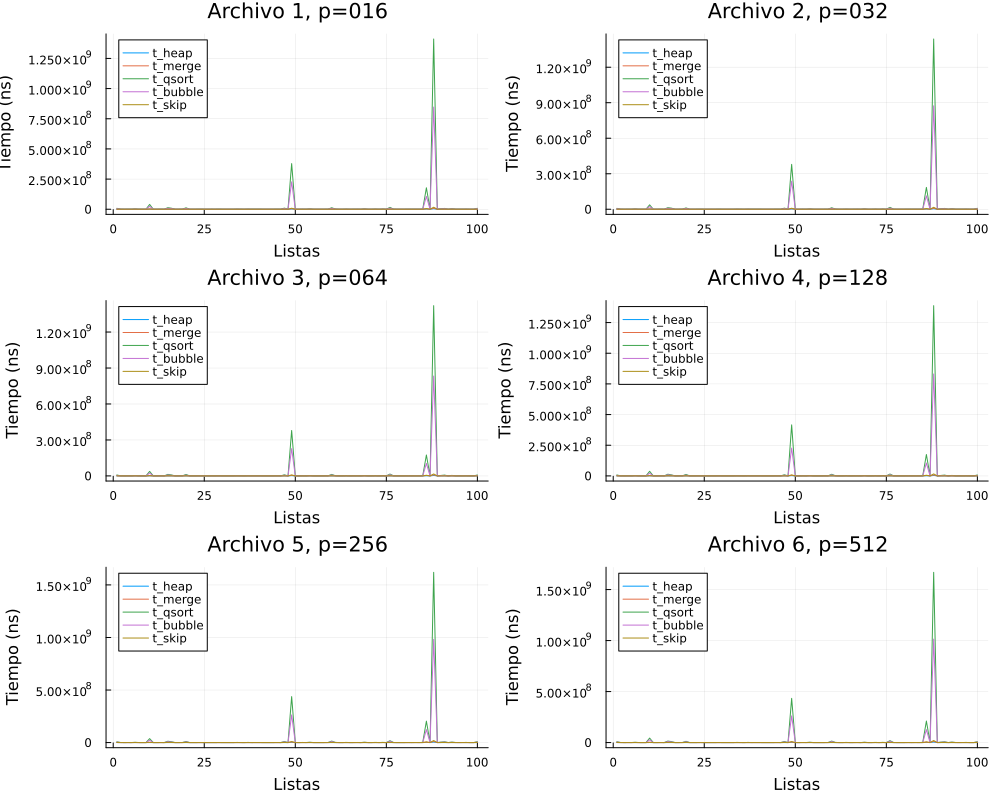

In [539]:
nombres = ["p=016", "p=032", "p=064", "p=128", "p=256", "p=512"]
plot(layout=(3, 2), size=(1000, 800))
for i in 1:6
    xvalues = 1:100

    plot!(subplot=i)

    for col in names(b_df[i])[3:end]
        plot!(xvalues, b_df[i][!, col], label=col, lw=1, subplot=i)
    end
    xlabel!("Listas", subplot=i)
    ylabel!("Tiempo (ns)", subplot=i)
    title!("Archivo $i, $(nombres[i])", subplot=i)
end

display(plot!())

Para observar con mayor detalle los algoritmos de heapsort, mergesort y skipsort se grafican únicamente para estos algoritmos, observando que de los 3 el mejor es heapsort y el peor es skipsort, aún así los tiempos se mantienen constantes para todos los archivos excepto para las perturbaciones de $p=256$ y $p=512$

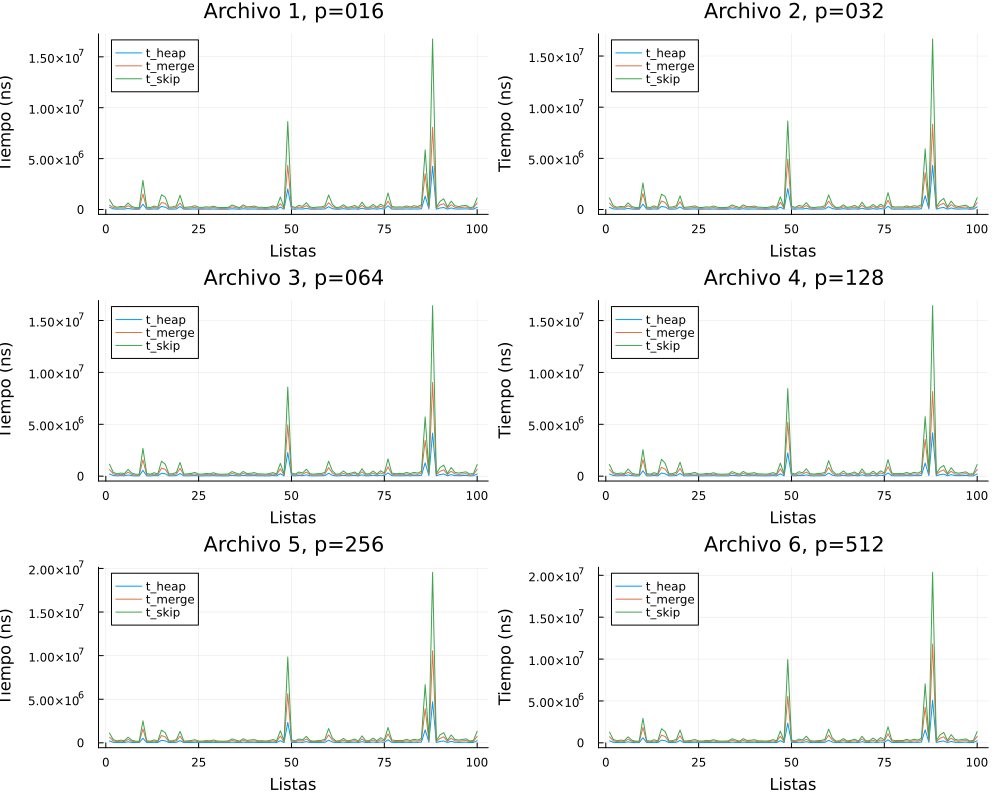

In [549]:
plot(layout=(3, 2), size=(1000, 800))
for i in 1:6
    xvalues = 1:100

    plot!(subplot=i)
    colums = names(b_df[i])[[3,4,7]]
    for col in colums
        plot!(xvalues, b_df[i][!, col], label=col, lw=1, subplot=i)
    end
    xlabel!("Listas", subplot=i)
    ylabel!("Tiempo (ns)", subplot=i)
    title!("Archivo $i, $(nombres[i])", subplot=i)
end

display(plot!())

Los picos abruptos que se observan en las gráficas es debido a que en ese rango de llaves el tamaño de las listas es grande como se aprecia a continuación.

In [573]:
b_df[1][40:50,:]

11×7 DataFrame
 Row │ LLaves       Size   t_heap     t_merge    t_qsort    t_bubble   t_skip  ⋯
     │ Any          Any    Any        Any        Any        Any        Any     ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ anos         960    54114.0    199537.0   734978.0   440592.0   3.40918 ⋯
   2 │ nueva        615    31974.0    125436.0   304554.0   182528.0   216227.
   3 │ 🇽            636    33508.0    1.2984e5   325402.0   195047.0   224020.
   4 │ historia     544    27452.0    108876.0   239059.0   143297.0   190310.
   5 │ 👇           660    35081.0    1.3584e5   350087.0   209866.0   232333. ⋯
   6 │ empresarios  980    55691.0    204094.0   765607.0   458990.0   346302.
   7 │ pan          633    32977.0    129339.0   322371.0   193238.0   2.2267e
   8 │ #amlo        3382   235089.0   5.70178e5  9.44535e6  5.65432e6  1.22704
   9 │ mayoria      594    31211.0    121831.0   284338.0   170427.0   2.09296 ⋯
  10 │ amlo         21435  2.02264e6  4.32898e6  3.78449e8  2.27193e8  8.63859
  11 │ campana      899    50916.0    1.87828e5  645276.0   386833.0   316828.
                                                                1 column omitted

In [574]:
b_df[1][85:95,:]

11×7 DataFrame
 Row │ LLaves           Size   t_heap     t_merge    t_qsort    t_bubble   t_s ⋯
     │ Any              Any    Any        Any        Any        Any        Any ⋯
─────┼──────────────────────────────────────────────────────────────────────────
   1 │ pompeo           1338   82220.0    2.81708e5  1.4714e6   854198.0   472 ⋯
   2 │ @lopezobrador_   14714  1.31174e6  3.51298e6  1.77929e8  1.06284e8  5.8
   3 │ palacio          1112   65934.0    230197.0   986511.0   589795.0   3.9
   4 │ _url             41328  4.25266e6  8.07713e6  1.41085e9  8.4675e8   1.6
   5 │ partido          692    36929.0    142032.0   384441.0   230440.0   2.4 ⋯
   6 │ obrador          2222   149223.0   4.5202e5   4.04974e6  2.40793e6  7.9
   7 │ nieto            2894   196737.0   5.65928e5  6.91537e6  4.10992e6  1.0
   8 │ @accionnacional  735    40002.0    150567.0   433099.0   259601.0   2.5
   9 │ lopez            2282   153757.0   463127.0   4.27998e6  2.54332e6  818 ⋯
  10 │ morena           1050   60210.5    214339.0   877928.0   526316.0   3.6
  11 │ victoria         824    45105.0    1.69836e5  543031.0   325502.0   2.9
                                                                1 column omitted

Nuevamente para comparar cuántas operaciones efectuó cada algoritmo se grafican para todos los archivos y se aprecia que los algoritmos con mayor número de comparaciones es bubblesort y qsort, siendo bubblesort el que alcanza un factor de $8\times10^8$ comparaciones para los tamaños de listas más grandes, en este caso no se aprecian diferencias respecto al nivel de pertubación.

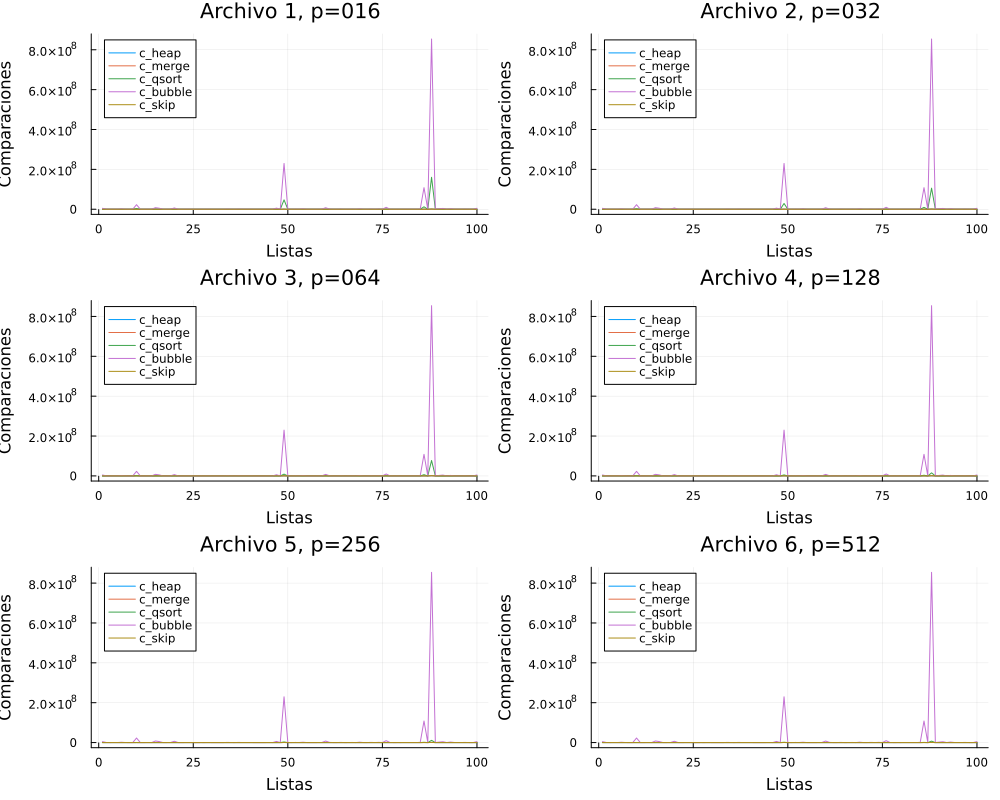

In [553]:
plot(layout=(3, 2), size=(1000, 800))  
for i in 1:6
    xvalues=[1:100]
    for col in names(c_df[i])[3:end]
        plot!(xvalues, c_df[i][!,col], label=col, lw=1, subplot=i)
    end
    xlabel!("Listas", subplot=i)
    ylabel!("Comparaciones")
    title!("Archivo $i, $(nombres[i])", subplot=i)
end
display(plot!())


Al graficar ahora para los algoritmos de heapsort, mergesort y skipsort, se aprecian variaciones de comparaciones muy pequeñas, que casi no se notan entre las diferentes perturbaciones, podemos decir que se tiene en general el mismo número de comparaciones para cada algoritmo.

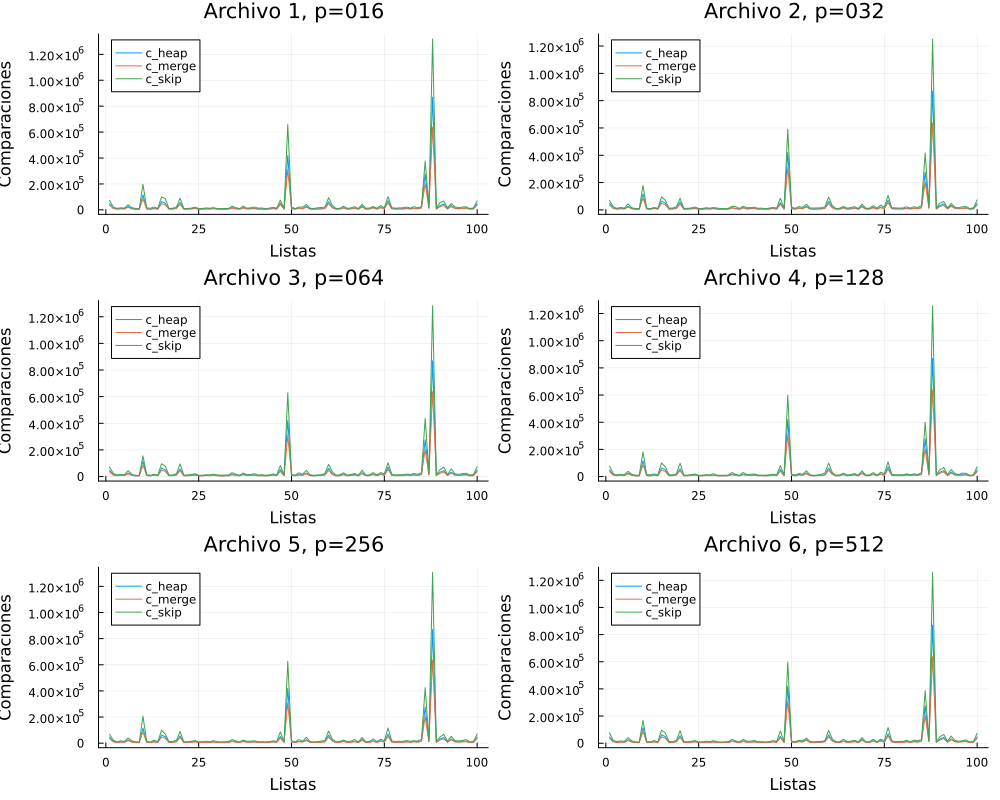

In [564]:
plot(layout=(3, 2), size=(1000, 800))  
for i in 1:6
    xvalues=[1:100]
    colums = names(c_df[i])[[3,4,7]]
    for col in colums
        plot!(xvalues, c_df[i][!,col], label=col, lw=1, subplot=i)
    end
    xlabel!("Listas", subplot=i)
    ylabel!("Comparaciones")
    title!("Archivo $i, $(nombres[i])", subplot=i)
end
display(plot!())


Se obtienen los valores promedio de mediciones en tiempo real asi como de comparaciones por archivo con los siguientes bloques de código.

In [523]:
using Statistics

In [562]:
algoritmos = ["t_heap", "t_merge", "t_qsort", "t_bubble", "t_skip"]
nombres = ["p=016", "p=032", "p=064", "p=128", "p=256", "p=512"]

println("Archivo\t\tHeapSort\tMergeSort\tQuickSort\tBubbleSort\tSkiplists")
print()
for i in 1:6
    means = [mean(b_df[i][!, col]) for col in algoritmos]
    println(
        nombres[i], "\t\t",
        round(means[1], digits=2), "\t\t",
        round(means[2], digits=2), "\t\t",
        round(means[3], digits=2), "\t\t",
        round(means[4], digits=2), "\t\t",
        round(means[5], digits=2)
    )
end


Archivo		HeapSort	MergeSort	QuickSort	BubbleSort	Skiplists
148258.71		387738.26		2.166752359e7		1.299694532e7		726287.5
p=032		149085.28		408056.7		2.199977598e7		1.342888677e7		726346.58
p=064		149097.57		413513.1		2.170340641e7		1.283962059e7		720809.37
p=128		148760.62		409294.64		2.176434102e7		1.28103124e7		721532.16
p=256		159510.61		452706.42		2.467819079e7		1.492802142e7		792331.35
p=512		167519.39		482052.04		2.539163326e7		1.538255138e7		834000.62


Se obtienen los siguientes valores promedio de mediciones de comparaciones por archivo 

In [576]:
println("Archivo\t\tHeapSort\tMergeSort\tQuickSort\tBubbleSort\tSkiplists")
algoritmos = ["c_heap", "c_merge", "c_qsort", "c_bubble", "c_skip"]
for i in 1:6
    means = [mean(c_df[i][!, col]) for col in algoritmos]
    println(
        nombres[i], "\t\t",
        round(means[1], digits=2), "\t\t",
        round(means[2], digits=2), "\t\t",
        round(means[3], digits=2), "\t\t",
        round(means[4], digits=2), "\t\t",
        round(means[5], digits=2)
    )
end


Archivo		HeapSort	MergeSort	QuickSort	BubbleSort	Skiplists
31499.31		23677.13		2.38991206e6		1.310538699e7		48754.27
p=032		31452.9		23677.13		1.55831691e6		1.310538699e7		47451.54
p=064		31378.51		23677.13		1.00831274e6		1.310538699e7		48277.5
p=128		31223.54		23677.13		287774.25		1.310538699e7		47309.15
p=256		30997.95		23677.13		186756.07		1.310538699e7		48601.14
p=512		30700.56		23677.13		117253.69		1.310538699e7		46671.34


Para visualizar mejor los valores de tiempo promedio los ponemos en la siguiente tabla, todos los valores están en nanosegundos

| Archivo | HeapSort   | MergeSort  | QuickSort      | BubbleSort     | Skiplists  |
|---------|------------|------------|----------------|----------------|------------|
| p=016   | 148258.71  | 387738.26  | 2.166752359e7  | 1.299694532e7  | 726287.5   |
| p=032   | 149085.28  | 408056.7   | 2.199977598e7  | 1.342888677e7  | 726346.58  |
| p=064   | 149097.57  | 413513.1   | 2.170340641e7  | 1.283962059e7  | 720809.37  |
| p=128   | 148760.62  | 409294.64  | 2.176434102e7  | 1.28103124e7   | 721532.16  |
| p=256   | 159510.61  | 452706.42  | 2.467819079e7  | 1.492802142e7  | 792331.35  |
| p=512   | 167519.39  | 482052.04  | 2.539163326e7  | 1.538255138e7  | 834000.62  |

De la anterior se aprecia que el algoritmo más estable de todos es HeapSort esto debido a su naturaleza de árbol binario que tiene un crecimiento de la forma $O(nlog(n))$, se aprecia que mergesort tiene reducción en su tiempo para perturbaciones de $p=032$ y $p=064$ pero como se apreció en las gráficas no hay variaciones considerables. En cambio skiplist aumento el tiempo cuando las perturbaciones fueron de $p=256$ y $p=512$.

Y para visualizar las comparaciones promedio en cada archivo se muestra en la siguiente tabla

| Archivo | HeapSort  | MergeSort | QuickSort     | BubbleSort     | Skiplists |
|---------|-----------|-----------|---------------|----------------|-----------|
| p=016   | 31499.31  | 23677.13  | 2.38991206e6  | 1.310538699e7  | 48754.27  |
| p=032   | 31452.9   | 23677.13  | 1.55831691e6  | 1.310538699e7  | 47451.54  |
| p=064   | 31378.51  | 23677.13  | 1.00831274e6  | 1.310538699e7  | 48277.5   |
| p=128   | 31223.54  | 23677.13  | 287774.25     | 1.310538699e7  | 47309.15  |
| p=256   | 30997.95  | 23677.13  | 186756.07     | 1.310538699e7  | 48601.14  |
| p=512   | 30700.56  | 23677.13  | 117253.69     | 1.310538699e7  | 46671.34  |

Se logra apreciar que heapsort hace comparaciones aproximadamente constantes para todas las perturbaciones, mientras que mergesort y bubblesort indica que hizo el mismo número para todas, que aunque no es preciso el promedio, en las gráficas observamos un comportamiento muy similar.

El algoritmo que reduce el número de comparaciones para perturbaciones de $p=128,256,512$  es quicksort sin embargo los tiempos reales son casi iguales. Por otro lado skiplist mantuvo comparaciones muy similares para cada uno.

Definitivamente bubblesort hace demasiadas comparaciones sin importar el nivel de pertubación.

# Conclusiones

Uno de los primeros puntos a destacar en este reporte fue la complejidad de implementación de los algoritmos, ya que al ser algunos de ellos recursivos requería tener en cuenta las operaciones anidades que se van formando, por otro lado en la implementación de estos algoritmos se aprende sobre las estructuras que se pueden generar para mantener algunas propiedades como es el caso de Heap o Skip, que se generaron estructuras para almacenar características propias que no son adecuadas de almacenar en otros tipos de datos. A través de la propiedad *mutable* se pudieron cambiar valores de las estructuras dependiendo de la iteración de ordenamiento. También se introduce en las implementaciones el símbolo `!` que permite modificar en sitio los valores que se pasen como parámetros, es decir no se crean copias de las varibles cuando se pasan como parámetros de la función, se decidió usar ese principio para que las mediciones de tiempo real tuvieran el menor número de ruido en las mediciones, como los tiempos extras para alojar datos en memoria.

Una vez que se lograron las implementaciones de algoritmos, las mediciones de tiempo real se complicaron debido en primera instancia a que no se estaban ejecutando de forma adecuada, ya que al usar el símbolo `$` se interpolaban los parámetros para cada benchmark y siempre se operaba sobre la misma variable en memoria, por otro lado al no inicializar en cada `for` interno la variable `trials` se rescribian constantemente los valores al momento de guardarlo en el diccionario `f_trials`, una vez haciendo esos ajustes se midieron nuevamente los datos. Se tuvo el mismo comportamiento para guardar los valores de `f_comparaciones`. Además de ello el tiempo para obtener estas mediciones fue de aproximadamente de 3.5 horas haciendo muy impráctica su evaluación, en próximas mediciones de desempeño se intentará hacerlas por separado o en grupos más pequeños para ir obtieniendo resultados preliminares y considerar valores para los parámetors de `samples` y `evals` más pequeños.

El hecho de acomodar los datos en dataframes facilitó la generación de gráficas, aunque requirió un tiempo considerable para lograr esa conversión debido al desconocimiento de los DataFrames en Julia. 

Con las gráficas que se pudieron obtener de las comparaciones en cada algoritmo se notó que el que realizaba por encima de todos era bubbleSort, haciéndolo uno de los más lentos, mientras que el mejor fue heapsort. Sin embargo a pesar de que cada archivo tenía diferente nivel de perturbación fueron cambios muy ligeros en general, ya que no se lograron visualizar mas que para tamaños de listas muy grandes.


# Referencias
[1] Cormen, T. H., Leiserson, C. E., Rivest, R. L., & Stein, C. (2022). Introduction to algorithms. MIT press. 

[2] Pugh, W. (1990). Skip lists: a probabilistic alternative to balanced trees. Communications of the ACM, 33(6), 668-676.

[3] JuliaData. (n.d.). DataFrames.jl: Flexible and fast tabular data in Julia. Retrieved October 2023, en https://dataframes.juliadata.org/stable/, visitado 05/03/2025
